### Load Data (Homework 0)

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_id = '1wvKi-E6GJnRqAkYMpVPaRc0L0XgY0Wkq'
link = 'https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url = link.format(FILE_ID = file_id)

df = pd.read_csv(csv_url)

### Data Exploration

In [3]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
print('Num of rows: ' + str(df.shape[0])) #row count
print('Num of columns: ' + str(df.shape[1])) #column count

Num of rows: 5000
Num of columns: 21


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

#### Data Cleaning

In [15]:
df.voice_mail_plan[5]

'no'

In [16]:
df.intl_plan[5]

'yes'

In [17]:
df.churned[5]

'False.'

In [4]:
df.voice_mail_plan = df.voice_mail_plan.apply(lambda x: x.strip())
df.intl_plan = df.intl_plan.apply(lambda x: x.strip())
df.churned = df.churned.apply(lambda x: x.strip())

#### Understand the features

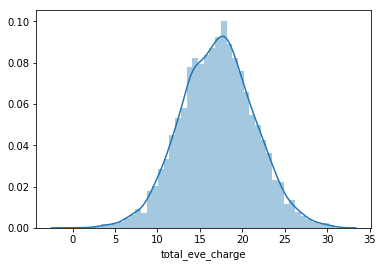

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df.total_eve_charge)


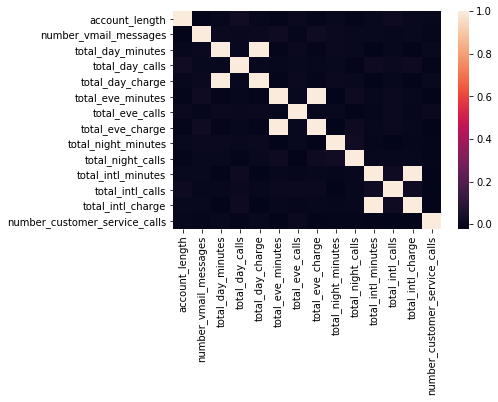

In [27]:
#correlation between all the features

corr = df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge","number_customer_service_calls"]].corr()

# show heapmap of correlations
sns.heatmap(corr)

In [28]:
# check the actual values of correlations
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.001291,0.014277,0.001292,-0.001445
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.002463,0.000124,0.002505,-0.007086
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,-0.019486,-0.001303,-0.019415,0.002733
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.013097,0.010893,0.013161,-0.010739
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,-0.019490,-0.001307,-0.019419,0.002726
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,0.000137,0.008388,0.000159,-0.013823
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,-0.007458,0.005574,-0.007507,0.006235
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,0.000132,0.008393,0.000155,-0.013836
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,-0.006721,-0.017214,-0.006655,-0.008533
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.000391,-0.000156,0.000368,-0.008283


### Feature Preprocessing

In [329]:
# Get ground truth data
y = np.where(df.churned == 'True.', 1,0)

In [330]:
# Drop some useless columns 

#to_drop = ['state', 'area_code', 'phone_number', 'churned']
to_drop = ['area_code', 'phone_number', 'churned']
churn_feat_space = df.drop(to_drop, axis = 1)

In [331]:
# yes and no have to be converted to boolean values

yes_no_cols = ['intl_plan', 'voice_mail_plan']
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'



In [287]:
churn_feat_space.head()

,state,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [243]:
# check the proportion of y = 1
print((y.sum() / y.shape )* 100)
# the data is actually balanced

[ 14.14]


### Model Training and Selection

In [289]:
to_drop = ['state', 'area_code', 'phone_number', 'churned']
churn_feat_space = df.drop(to_drop, axis = 1)

#yes and no have to be converted to boolean vales
yes_no_cols = ['intl_plan', 'voice_mail_plan']
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

X = churn_feat_space

In [290]:
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' feature')
print('testing data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' feature')



training data has 4000 observation with 17 feature
testing data has 1000 observation with 17 feature


In [291]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)



In [293]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# Support Vector Machine
classfier_SVC = SVC()

In [294]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Support Vector Machine']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classfier_SVC]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv = 5)
    print(cv_score)
    print('Model accuract of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[ 0.86375  0.87375  0.87     0.87625  0.875  ]
Model accuract of Logistic Regression is 0.87175
[ 0.89125  0.8975   0.905    0.905    0.91   ]
Model accuract of KNN is 0.90175
[ 0.94375  0.95625  0.95375  0.9575   0.95375]
Model accuract of Random Forest is 0.953
[ 0.91125  0.9225   0.93625  0.93625  0.93   ]
Model accuract of Support Vector Machine is 0.92725


Random Forest is the best

#### Add in State Variable, Encoding Method

In [332]:
# then try map state to region
st = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}
churn_feat_space_label = churn_feat_space
churn_feat_space_label.loc[:,'region'] = churn_feat_space['state'].map(st)
churn_feat_space_label.head()

,state,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,region
0,KS,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,M
1,OH,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,M
2,NJ,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,N
3,OH,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,M
4,OK,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,S


In [333]:
# try label encoding first
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn_feat_space_state = le.fit_transform(churn_feat_space_label['state'])
lg = LabelEncoder()
churn_feat_space_region = le.fit_transform(churn_feat_space_label['region'])

In [334]:
churn_feat_space_noState = churn_feat_space_label.drop(['state','region'], axis = 1)

In [335]:
churn_feat_space_label = np.concatenate((churn_feat_space_noState, churn_feat_space_state.reshape(-1,1), churn_feat_space_region.reshape(-1,1)), axis = 1)

In [336]:
churn_feat_space_label = pd.DataFrame(churn_feat_space_label)
churn_feat_space_label.columns = ['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls','state','region']
churn_feat_space_label.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state,region
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,16,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,35,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,31,1
3,84,True,False,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,35,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,36,3


In [337]:
# then try frequency encoding
fe = churn_feat_space_label.groupby('state').size()/len(churn_feat_space_label)
churn_feat_space_label.loc[:,'state_freq_encode'] = churn_feat_space_label['state'].map(fe)
churn_feat_space_label.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state,region,state_freq_encode
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,16,0,0.0198
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,35,0,0.0232
2,137,False,False,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,31,1,0.0224
3,84,True,False,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,35,0,0.0232
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,36,3,0.0180


In [338]:
X = churn_feat_space_label

In [339]:
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' feature')
print('testing data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' feature')



training data has 4000 observation with 20 feature
testing data has 1000 observation with 20 feature


In [340]:
X_labelEncoding = X_train.drop(['state_freq_encode','region'], axis = 1)
X_freqEncoding = X_train.drop(['state','region'], axis = 1)
X_region = X_train.drop(['state', 'state_freq_encode'], axis = 1)
X_noState = X_train.drop(['state', 'state_freq_encode', 'region'], axis = 1)
X_decorrelate = X_train.drop(['state', 'state_freq_encode', 'region', 'total_day_minutes','total_eve_charge'], axis = 1)

In [349]:
from sklearn.ensemble import RandomForestClassifier
parameters = {
    'n_estimators': (30,40,60,80) ,
    'max_depth' : (2,3,4,5,6),
    'min_samples_split': (2,3,4,5),
    'min_samples_leaf': (1,2,3)
    #,'class_weight': ({1:0.14, 0:0.86},{1:0.14, 0:0.86})
}
Grid_LR = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)
Grid_LR.fit(X_freqEncoding, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': (30, 40, 60, 80), 'max_depth': (2, 3, 4, 5, 6), 'min_samples_split': (2, 3, 4, 5), 'min_samples_leaf': (1, 2, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [346]:
#region encoding
print_grid_search_metrics(Grid_LR)

Best score: 0.933
Best parameters set:
max_depth:6
min_samples_leaf:1
min_samples_split:2
n_estimators:40


In [348]:
#label encoding
print_grid_search_metrics(Grid_LR)

Best score: 0.93175
Best parameters set:
max_depth:6
min_samples_leaf:1
min_samples_split:3
n_estimators:60


In [350]:
#freq encoding
print_grid_search_metrics(Grid_LR)

Best score: 0.93375
Best parameters set:
max_depth:6
min_samples_leaf:2
min_samples_split:2
n_estimators:60


In [344]:
# no state variable
print_grid_search_metrics(Grid_LR)

Best score: 0.93625
Best parameters set:
max_depth:6
min_samples_leaf:3
min_samples_split:3
n_estimators:40


In [342]:
# Decorrelate
print_grid_search_metrics(Grid_LR)

Best score: 0.91975
Best parameters set:
max_depth:6
min_samples_leaf:2
min_samples_split:5
n_estimators:40


State Variable doesn't add in value

### Predict and Evaluate

In [295]:
to_drop = ['state', 'area_code', 'phone_number', 'churned']
churn_feat_space = df.drop(to_drop, axis = 1)

#yes and no have to be converted to boolean vales
yes_no_cols = ['intl_plan', 'voice_mail_plan']
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

X = churn_feat_space

In [323]:
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' feature')
print('testing data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' feature')




training data has 4000 observation with 17 feature
testing data has 1000 observation with 17 feature


In [324]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [325]:
X_test = scaler.transform(X_test)

In [318]:
from sklearn.ensemble import RandomForestClassifier
parameters = {
    'n_estimators': (30,40,60,80) ,
    'max_depth' : (2,3,4,5,6),
    'min_samples_split': (2,3,4,5),
    'min_samples_leaf': (1,2,3)
    #,'class_weight': ({1:0.14, 0:0.86},{1:0.14, 0:0.86})
}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': (30, 40, 60, 80), 'max_depth': (2, 3, 4, 5, 6), 'min_samples_split': (2, 3, 4, 5), 'min_samples_leaf': (1, 2, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [319]:
print_grid_search_metrics(Grid_RF)

Best score: 0.93775
Best parameters set:
max_depth:6
min_samples_leaf:1
min_samples_split:3
n_estimators:80


In [320]:
best_RF_model = Grid_RF.best_estimator_
best_RF_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [326]:
best_RF_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [327]:
best_RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [314]:
# Evalution
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#accuracy metrics
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print("Accuracy is: ", accuracy)
    print("Precision is: ", precision)
    print("Recall is: ", recall)
    
#print out confusion matrices
def draw_confusion_matrices(confusion_matric):
    class_names = ['Not', 'Churn']
    classifier, cm = confusion_matric[0], confusion_matric[1]
    cal_evaluation(classifier, cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, interpolation = 'nearest', cmap = plt.get_cmap('Reds'))
    plt.title('Confusion matrix for ' + classifier)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    

Random Forest
Accuracy is:  0.936
Precision is:  0.96261682243
Recall is:  0.631901840491


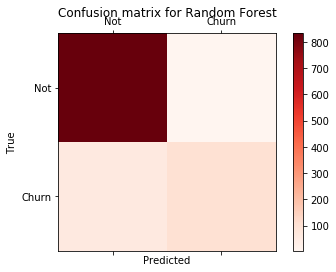

In [328]:
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test)))
   
draw_confusion_matrices(confusion_matrices)

In [316]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

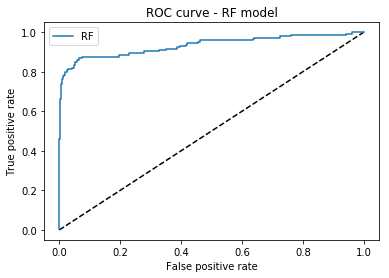

In [317]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

### Feature Importance Discussion

In [351]:
importances = best_RF_model.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X_train.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.1945
total_day_charge: 0.1867
number_customer_service_calls: 0.1587
intl_plan: 0.0826
total_intl_calls: 0.0587
total_eve_charge: 0.0585
total_eve_minutes: 0.0467
voice_mail_plan: 0.0375
total_intl_charge: 0.034
number_vmail_messages: 0.0291
total_night_charge: 0.0258
total_intl_minutes: 0.0243
total_night_minutes: 0.0215
account_length: 0.0117
total_day_calls: 0.0115
total_night_calls: 0.0095
total_eve_calls: 0.0087
